In [1]:
cd /class/datamine/corporate/farfetch/

/class/datamine/corporate/farfetch


In [38]:
import json
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data.dataset import Dataset
import os
import time
import numpy as np
from PIL import Image
from torch.utils.data.dataset import Dataset
from tqdm import tqdm
from torchvision import transforms
from torchvision import models

import torch
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import precision_score, recall_score, f1_score
from torch import nn
from torch.utils.data.dataloader import DataLoader
from matplotlib import pyplot as plt
from numpy import printoptions
import requests
import tarfile
import random
import json
from shutil import copyfile

In [4]:
file=pd.read_json('meta_all_129927.json')
#can test with small dataset
sfile=pd.read_json('300portion_data.json')

In [5]:
def unique(list1):
    x = np.array(list1)
    return(np.unique(x))
uniq=[]
for i in file['attr']:
    #print(unique(i))
    if unique(i) is not None:
        for j in unique(i):
            uniq.append(j) 
freq=Counter(uniq,reverse=True)
ranking=sorted(freq.items(), key=lambda pair: pair[1], reverse=True)
att_list=[i[0] for i in ranking[1:51]]

In [6]:
word_map_file = "/class/datamine/corporate/farfetch/ECCV_data/WORDMAP.json"
word_map_file = word_map_file
with open(word_map_file, 'r') as f:
    word_map = json.load(f)

In [7]:
word_map['classic']

186

In [8]:
att_dict={}
for i in att_list:
    att_dict[i]=word_map[i]

In [9]:
len(att_dict)

50

In [10]:
import h5py
import h5py
import json
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data_folder = "/class/datamine/corporate/farfetch/ECCV_data"
meta_folder= "/class/datamine/corporate/farfetch/"
split = "VAL"
h = h5py.File(os.path.join(data_folder, split + '_IMAGES' + '.hdf5'), 'r')
imgs = h['images']
total_nr_items = imgs.shape[0]
with open(os.path.join(data_folder, split + '_ATTRS' + '.json'), 'r') as j:
    attrs = json.load(j)
with open(os.path.join(data_folder, split + '_ATTRS_RAW' + '.json'), 'r') as j:
    raw = json.load(j)

In [11]:
os.path.join(data_folder, split + '_IMAGES' + '.hdf5')

'/class/datamine/corporate/farfetch/ECCV_data/VAL_IMAGES.hdf5'

In [12]:
attrs[0]

[129, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 538, 0, 0, 0, 0, 0, 0, 0, 620]

In [13]:
#get top 50 attributes
def unique(list1):
    x = np.array(list1)
    return(np.unique(x))
uniq=[]
for i in file['attr']:
    #print(unique(i))
    if unique(i) is not None:
        for j in unique(i):
            uniq.append(j) 
freq=Counter(uniq,reverse=True)
ranking=sorted(freq.items(), key=lambda pair: pair[1], reverse=True)
att_list=[i[0] for i in ranking[1:51]]
att_dict={}#unique labels dict
ct=0
for i in att_list:
    att_dict[ct]=i
    ct+=1
#keep only top 50 attributes for the dataset
cleaned={} #label dict with top 50 attrs, cleared empty len=18326
empty=[]#item id with empty attrs len=1589
for n in range(len(raw)):
    new=[]
    for i in raw[n]:
        if i in att_list:
            new.append(i)
    if len(new)==0:
        empty.append(n)
    else:
        cleaned[n]=new
#clean imgs shape (18326, 3, 256, 256)
clean_imgs=np.delete(imgs, empty, 0)

In [14]:
att_dict[0]

'cotton'

In [15]:
#get key with value
def get_key(att_dic,value):
    key_list = list(att_dict.keys())
    val_list = list(att_dict.values())
    position = val_list.index(value)
    return(key_list[position])

In [16]:
att_dict

{0: 'cotton',
 1: 'cut',
 2: 'soft',
 3: 'look',
 4: 'style',
 5: 'sleeve',
 6: 'fit',
 7: 'stretch',
 8: 'classic',
 9: 'comfort',
 10: 'print',
 11: 'leather',
 12: 'knit',
 13: 'waist',
 14: 'hem',
 15: 'blend',
 16: 'day',
 17: 'easy',
 18: 'front',
 19: 'stripe',
 20: 'strap',
 21: 'high',
 22: 'lightweight',
 23: 'button',
 24: 'shoulder',
 25: 'neck',
 26: 'leg',
 27: 'logo',
 28: 'slim',
 29: 'heel',
 30: 'color',
 31: 'signature',
 32: 'neckline',
 33: 'denim',
 34: 'wool',
 35: 'modern',
 36: 'cool',
 37: 'one-piece',
 38: 'collar',
 39: 'lace',
 40: 'side',
 41: 'perfect',
 42: 'pocket',
 43: 'silk',
 44: 'cuff',
 45: 'pattern',
 46: 'floral',
 47: 'toe',
 48: 'detail',
 49: 'cozy'}

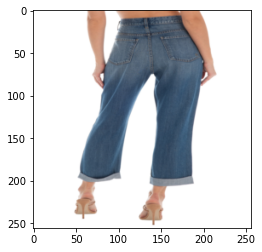

In [17]:
#Show images
x = clean_imgs[7]
y = np.transpose(x, (1, 2, 0)) 
plt.imshow(y)
plt.show()

In [18]:
#encode 0,1 for att labels, col index is att_dict 
def encode(df,att_dic):
    y1 = np.zeros([len(df), len(att_list)])
    y1 = pd.DataFrame(y1)
    for i in range(len(df)):
        for att in df[i]:
            key=get_key(att_dic,att)
            y1.iloc[i,key]=1
    return y1
encode_y=encode(np.array(list(cleaned.values())),att_dict)

<ipython-input-18-5b1bedd886fe>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  encode_y=encode(np.array(list(cleaned.values())),att_dict)


In [19]:
encode_y.shape
encode_y

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
np.where(np.array(encode_y)[0,:] == 1)[0]

array([ 8, 36])

In [21]:
get_key(att_dict,'classic')

8

In [22]:
#split to train/test
X_train,X_test,Y_train,Y_test = train_test_split(clean_imgs,encode_y,test_size = 0.3)
X_train, X_val, Y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [23]:
X_train.shape

(9621, 3, 256, 256)

In [24]:
X_test.shape

(5498, 3, 256, 256)

In [25]:
X_val.shape

(3207, 3, 256, 256)

In [26]:
class ECCV_Dataset(Dataset):
    def __init__(self, imgs, attrs, transforms):
#         with open(anno_path) as fp:
#             json_data = json.load(fp)
#         samples = json_data['samples']
        self.transforms = transforms
        self.classes = att_list

        self.imgs = imgs
        self.annos = attrs
       # self.data_path = data_path
      #  print('loading', anno_path)
#         for sample in samples:
#             self.imgs.append(sample['image_name'])
#             self.annos.append(sample['image_labels'])
#         for item_id in range(len(self.annos)):
#             item = self.annos[item_id]
#             vector = [cls in item for cls in self.classes]
#             self.annos[item_id] = np.array(vector, dtype=float)
    def __getitem__(self, item):
        anno = np.array(self.annos)[item,:]
        img = torch.from_numpy(self.imgs[item])
     #   img_path = os.path.join(self.data_path, self.imgs[item])
#         img = Image.open(img_path)
        if self.transforms is not None:
            img = self.transforms(img)
        return img, anno

    def __len__(self):
        return len(self.imgs)

In [27]:
print(np.array(Y_train)[0, :])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [28]:
# Test preprocessing
val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean, std)
])
# print(tuple(np.array(np.array(mean)*255).tolist()))

# Train preprocessing
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(),
#     transforms.RandomAffine(degrees=20, translate=(0.2, 0.2), scale=(0.5, 1.5),
#                             shear=None, resample=False, 
#                             fillcolor=tuple(np.array(np.array(mean)*255).astype(int).tolist())),
#     transforms.ToTensor(),
#     transforms.Normalize(mean, std)
])

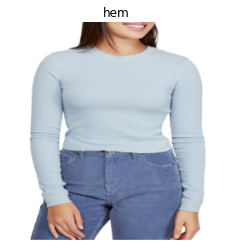

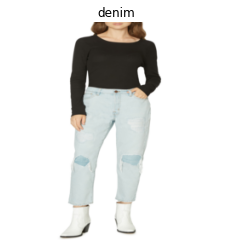

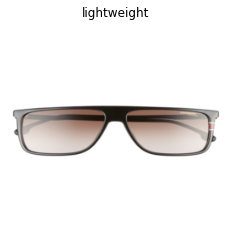

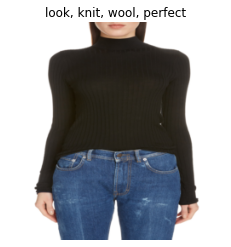

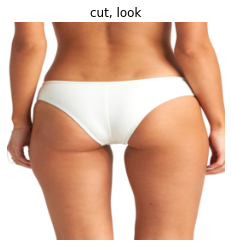

In [29]:
# Initialize the training parameters.
num_workers = 1 # Number of CPU processes for data preprocessing
batch_size = 32
max_epoch_number = 35
learning_rate = 1e-3
save_freq = 1 # Save checkpoint frequency (epochs)
test_freq = 50 # Test model frequency (iterations)

# mean = [0.485, 0.456, 0.406]
# std = [0.229, 0.224, 0.225]

device = torch.device('cpu')
# Save path for checkpoints
save_path = 'chekpoints/'


#visualization function
dataset_train=ECCV_Dataset(X_train,Y_train, train_transform)
dataset_test = ECCV_Dataset(X_test,Y_test, val_transform)
dataset_val = ECCV_Dataset(X_val,Y_val, val_transform)
train_dataloader = DataLoader(dataset_train, batch_size=batch_size, num_workers=num_workers, shuffle=True,
                              drop_last=True)
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, num_workers=num_workers)
val_dataloader = DataLoader(dataset_val, batch_size=batch_size, num_workers=num_workers)


def show_sample(data):
    # Convert the binary labels back to the text representation. 
    img, binary_img_labels=data
  #  print(binary_img_labels)
    img_labels = np.where(np.array(binary_img_labels)== 1)
    att_labels=[]
    for i in img_labels[0]:
        att_labels.append(att_dict[i])

    y = np.transpose(img, (1, 2, 0)) 
    plt.imshow(y)
    plt.title("{}".format(', '.join(att_labels)))
    plt.axis('off')
    plt.show()

for sample_id in range(5):
    show_sample(dataset_val[sample_id])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]]
Label distribution (count, class name): [(369, 'pattern'), (414, 'cool'), (427, 'floral'), (433, 'silk'), (448, 'cuff'), (458, 'detail'), (491, 'wool'), (505, 'side'), (510, 'collar'), (521, 'button'), (528, 'slim'), (534, 'denim'), (539, 'leg'), (547, 'pocket'), (562, 'cozy'), (563, 'color'), (598, 'shoulder'), (600, 'logo'), (620, 'neckline'), (625, 'perfect'), (642, 'lace'), (674, 'stripe'), (697, 'modern'), (714, 'one-piece'), (732, 'toe'), (747, 'neck'), (755, 'lightweight'), (759, 'print'), (759, 'front'), (792, 'signature'), (820, 'day'), (841, 'blend'), (909, 'waist'), (913, 'hem'), (923, 'high'), (941, 'easy'), (1026, 'heel'), (1059, 'stretch'), (1059, 'knit'), (1149, 'classic'), (1258, 'strap'), (1270, 'fit'), (1291, 'comfort'), (1324, 'sleeve'), (1372, 'leather'), (1557, 'look'), (1614, 'style'), (1746, 'soft'), (1922, 'c

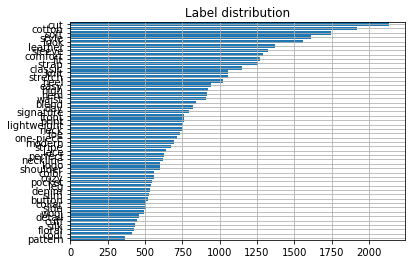

In [30]:
# Calculate label distribution for the entire dataset (train + test)
samples = list(np.array((dataset_train.annos))) + list(np.array((dataset_val.annos)))
samples = np.array(samples)
print(samples)
with printoptions(precision=3, suppress=True):
    class_counts = np.sum(samples, axis=0)
    # Sort labels according to their frequency in the dataset.
    sorted_ids = np.array([i[0] for i in sorted(enumerate(class_counts), key=lambda x: x[1])], dtype=int)
    print('Label distribution (count, class name):', list(zip(class_counts[sorted_ids].astype(int), np.array(dataset_val.classes)[sorted_ids])))
    plt.barh(range(len(dataset_val.classes)), width=class_counts[sorted_ids])
    plt.yticks(range(len(dataset_val.classes)), np.array(dataset_val.classes)[sorted_ids])
    plt.gca().margins(y=0)
    plt.grid()
    plt.title('Label distribution')
    plt.show()

In [31]:
import torch
import torch.nn as nn

# Use the torchvision's implementation of ResNeXt, but add FC layer for a different number of classes (27) and a Sigmoid instead of a default Softmax.
class Resnext50(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        resnet = models.resnext50_32x4d(pretrained=True)
        resnet.fc = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(in_features=resnet.fc.in_features, out_features=n_classes)
        )
        self.base_model = resnet
        self.sigm = nn.Sigmoid()

    def forward(self, x):
        return self.sigm(self.base_model(x))


# Initialize the model
model = Resnext50(len(dataset_train.classes))
# Switch model to the training mode and move it to GPU.
model.train()
model = model.to(device)

# If more than one GPU is available we can use both to speed up the training.
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

os.makedirs(save_path, exist_ok=True)

# Loss function
criterion = nn.BCELoss()
# Tensoboard logger
# logger = SummaryWriter(logdir)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [32]:
# Use threshold to define predicted labels and invoke sklearn's metrics with different averaging strategies.
def calculate_metrics(pred, target, threshold=0.5):
    pred = np.array(pred > threshold, dtype=float)
    return {'micro/precision': precision_score(y_true=target, y_pred=pred, average='micro'),
            'micro/recall': recall_score(y_true=target, y_pred=pred, average='micro'),
            'micro/f1': f1_score(y_true=target, y_pred=pred, average='micro'),
            'macro/precision': precision_score(y_true=target, y_pred=pred, average='macro'),
            'macro/recall': recall_score(y_true=target, y_pred=pred, average='macro'),
            'macro/f1': f1_score(y_true=target, y_pred=pred, average='macro'),
            'samples/precision': precision_score(y_true=target, y_pred=pred, average='samples'),
            'samples/recall': recall_score(y_true=target, y_pred=pred, average='samples'),
            'samples/f1': f1_score(y_true=target, y_pred=pred, average='samples'),
            }

In [33]:
# Here is an auxiliary function for checkpoint saving.
def checkpoint_save(model, save_path, epoch):
    f = os.path.join(save_path, 'checkpoint-{:06d}.pth'.format(epoch))
    if 'module' in dir(model):
        torch.save(model.module.state_dict(), f)
    else:
        torch.save(model.state_dict(), f)
    print('saved checkpoint:', f)

In [55]:
len(train_dataloader)

300

In [34]:
#training process
epoch = 0
iteration = 0
min_val_loss=999999
while True:
    batch_losses = []
    for imgs, targets in train_dataloader[:20]:
        model.train()
#         print(1)
        imgs, targets = imgs.to(device=device, dtype=torch.float), targets.to(device)

        optimizer.zero_grad()

        model_result = model(imgs)
        loss = criterion(model_result, targets.type(torch.float))

        batch_loss_value = loss.item()
        loss.backward()
        optimizer.step()

        batch_losses.append(batch_loss_value)

#         if iteration % test_freq == 0:
#             model.eval()
#             with torch.no_grad():
#                 model_result = []
#                 targets = []
#                 for imgs, batch_targets in test_dataloader:
#                     imgs = imgs.to(device=device, dtype=torch.float)
#                     model_batch_result = model(imgs)
#                     model_result.extend(model_batch_result.cpu().numpy())
#                     targets.extend(batch_targets.cpu().numpy())

#             result = calculate_metrics(np.array(model_result), np.array(targets))
#             print("epoch:{:2d} iter:{:3d} test: "
#                   "micro f1: {:.3f} "
#                   "macro f1: {:.3f} "
#                   "samples f1: {:.3f}".format(epoch, iteration,
#                                               result['micro/f1'],
#                                               result['macro/f1'],
#                                               result['samples/f1']))
        print('iteration: '+str(iteration)+"loss: "+ str(batch_loss_value))
        iteration += 1
    
    loss_value = np.mean(batch_losses)
    #testing 
    model.eval()
    with torch.no_grad():
        model_result = []
        targets = []
        for imgs, batch_targets in test_dataloader:
            imgs = imgs.to(device=device, dtype=torch.float)
            model_batch_result = model(imgs)
            model_result.extend(model_batch_result.cpu().numpy())
            targets.extend(batch_targets.cpu().numpy())

    result = calculate_metrics(np.array(model_result), np.array(targets))
    print("epoch:{:2d} iter:{:3d} test: "
          "micro f1: {:.3f} "
          "macro f1: {:.3f} "
          "samples f1: {:.3f}".format(epoch,
                                      result['micro/f1'],
                                      result['macro/f1'],
                                      result['samples/f1']))
    
    model.train() # change back to training mode
    
    print("epoch:{:2d} iter:{:3d} train: loss:{:.3f}".format(epoch, iteration, loss_value))
    
    if loss_value < min_val_loss:
        min_val_loss=loss_value
        epochs_no_improve = 0
        checkpoint_save(model, save_path, epoch)
    else:
        epochs_no_improve+=1
        if epochs_no_improve==8:
            print('earlystop')
            break
    
#     if epoch % save_freq == 0:
#         checkpoint_save(model, save_path, epoch)
    epoch += 1
    if max_epoch_number < epoch:
        break

iteration: 0loss: 0.6920725107192993
iteration: 1loss: 0.39509254693984985
iteration: 2loss: 0.2691078186035156
iteration: 3loss: 0.22030353546142578
iteration: 4loss: 0.23268882930278778
iteration: 5loss: 0.23331105709075928
iteration: 6loss: 0.20335529744625092
iteration: 7loss: 0.24279335141181946
iteration: 8loss: 0.1984996348619461
iteration: 9loss: 0.21121534705162048
iteration: 10loss: 0.20054994523525238
iteration: 11loss: 0.22157855331897736
iteration: 12loss: 0.22054371237754822
iteration: 13loss: 0.1972590982913971
iteration: 14loss: 0.2472280114889145
iteration: 15loss: 0.23337972164154053
iteration: 16loss: 0.23010697960853577
iteration: 17loss: 0.22233226895332336
iteration: 18loss: 0.19326958060264587
iteration: 19loss: 0.2196185141801834
iteration: 20loss: 0.19460444152355194
iteration: 21loss: 0.22607849538326263
iteration: 22loss: 0.2207149863243103
iteration: 23loss: 0.2224075347185135
iteration: 24loss: 0.21611469984054565
iteration: 25loss: 0.20356056094169617
iter

iteration: 210loss: 0.23416568338871002
iteration: 211loss: 0.20696000754833221
iteration: 212loss: 0.21317793428897858
iteration: 213loss: 0.22228629887104034
iteration: 214loss: 0.22425009310245514
iteration: 215loss: 0.20621517300605774
iteration: 216loss: 0.1994098424911499
iteration: 217loss: 0.1888650506734848
iteration: 218loss: 0.21360263228416443
iteration: 219loss: 0.19861645996570587
iteration: 220loss: 0.19092078506946564
iteration: 221loss: 0.2029685080051422
iteration: 222loss: 0.20243524014949799
iteration: 223loss: 0.2060166597366333
iteration: 224loss: 0.18558111786842346
iteration: 225loss: 0.20742115378379822


KeyboardInterrupt: 

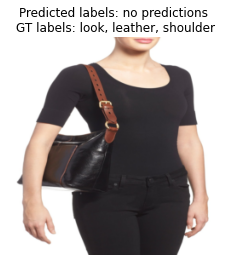

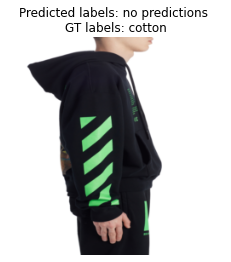

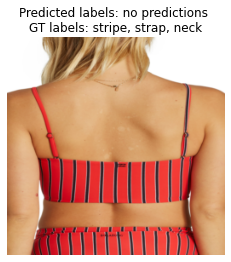

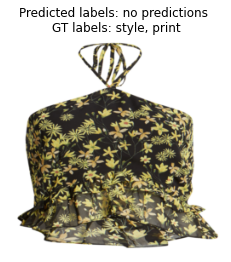

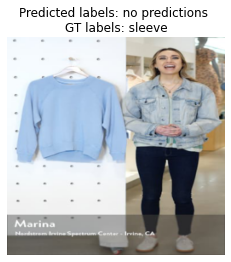

In [49]:
# Run inference on the test data
model.eval()
for sample_id in [1,2,3,4,6]:
    test_img, test_labels = dataset_val[sample_id]
#     test_img_path = os.path.join(img_folder, dataset_val.imgs[sample_id])
    with torch.no_grad():
#         raw_pred = model(test_img.unsqueeze(0)).cpu().numpy()[0]
        x_in = test_img.to(device=device, dtype=torch.float)
        raw_pred = model(x_in.unsqueeze(0)).cpu().numpy()[0]
        raw_pred = np.array(raw_pred > 0.5, dtype=float)

    predicted_labels = np.array(dataset_val.classes)[np.argwhere(raw_pred > 0)[:, 0]]
    if not len(predicted_labels):
        predicted_labels = ['no predictions']
    img_labels = np.array(dataset_val.classes)[np.argwhere(test_labels > 0)[:, 0]]
    test_img_trans = np.transpose(test_img, (1, 2, 0)) 
    plt.imshow(test_img_trans)
    plt.title("Predicted labels: {} \nGT labels: {}".format(', '.join(predicted_labels), ', '.join(img_labels)))
    plt.axis('off')
    plt.show()